# <b>Digital Recognition Notebook</b>

## Neural Network

In [2]:
# import keras
import keras as kr

import numpy as np

model = kr.models.Sequential()

model.add(kr.layers.Dense(units=1000, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Using TensorFlow backend.


tf.estimator package not installed.
tf.estimator package not installed.


In [3]:
import gzip

# This opens the images file which is located in our local directory and assigns the read in value to a variable
#with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
#    image_content = f.read()
    
#with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
#    label_content = f.read()
    
    
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [4]:
import numpy as np

image = ~np.array(list(image_content[16:])).reshape(10000,28,28).astype(np.uint8)

# Display the bytes as 1s and 0s in an array
print((~image[0]).astype(np.bool).astype(np.uint8))

NameError: name 'image_content' is not defined

In [5]:
import sklearn.preprocessing as pre
print(pre)

<module 'sklearn.preprocessing' from 'D:\\Anaconda3\\lib\\site-packages\\sklearn\\preprocessing\\__init__.py'>


In [6]:
inputs = train_img.reshape(60000, 784)
print(train_img)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


In [7]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [8]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


In [36]:
model.fit(inputs, outputs, epochs=2, batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 13s 209us/step - loss: 0.7478 - acc: 0.7887
Epoch 2/2
60000/60000 [==============================] - 12s 205us/step - loss: 0.3951 - acc: 0.8856


Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 12s 272us/step - loss: 0.1653 - acc: 0.9530 - val_loss: 0.1744 - val_acc: 0.9514
Epoch 2/20
45000/45000 [==============================] - 13s 279us/step - loss: 0.1605 - acc: 0.9536 - val_loss: 0.1794 - val_acc: 0.9480
Epoch 3/20
45000/45000 [==============================] - 12s 274us/step - loss: 0.1552 - acc: 0.9555 - val_loss: 0.1745 - val_acc: 0.9497
Epoch 4/20
45000/45000 [==============================] - 12s 273us/step - loss: 0.1501 - acc: 0.9572 - val_loss: 0.1668 - val_acc: 0.9515
Epoch 5/20
45000/45000 [==============================] - 12s 272us/step - loss: 0.1456 - acc: 0.9582 - val_loss: 0.1634 - val_acc: 0.9531
Epoch 6/20
45000/45000 [==============================] - 12s 269us/step - loss: 0.1415 - acc: 0.9594 - val_loss: 0.1568 - val_acc: 0.9551
Epoch 7/20
45000/45000 [==============================] - 12s 269us/step - loss: 0.1369 - acc: 0.9616 - val_loss: 0.

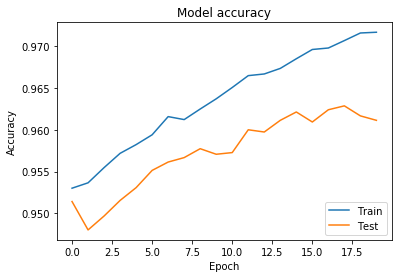

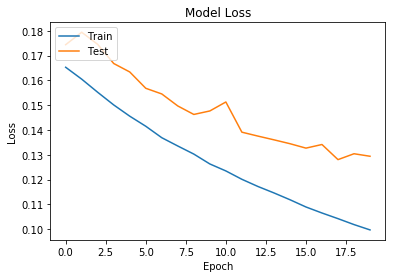

In [10]:
import matplotlib.pyplot as plt

training = model.fit(inputs, outputs, validation_split=0.25, epochs=20, batch_size=100, verbose=1)

# Plot training & validation accuracy values
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [12]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

8985

In [13]:
model.predict(test_img[5:6])

array([[1.5429021e-05, 9.6844000e-01, 1.1015500e-02, 7.7242730e-03,
        7.3000447e-05, 3.0352670e-04, 2.1726568e-04, 4.9345144e-03,
        5.9866104e-03, 1.2898021e-03]], dtype=float32)

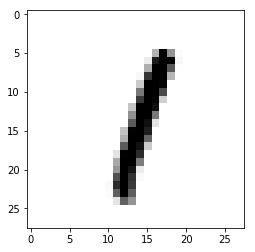

In [18]:
import matplotlib.pyplot as plt

plt.imshow(test_img[5].reshape(28, 28), cmap='gray')

In [25]:
%run -i "Digit-Recog.py"

11493376/11490434 [==============================] - 114s 10us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 204s - loss: 0.1662 - acc: 0.9495 - val_loss: 0.0407 - val_acc: 0.9863
Epoch 2/10
 - 204s - loss: 0.0439 - acc: 0.9860 - val_loss: 0.0295 - val_acc: 0.9903
Epoch 3/10
 - 212s - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0248 - val_acc: 0.9913
Epoch 4/10
 - 209s - loss: 0.0216 - acc: 0.9934 - val_loss: 0.0232 - val_acc: 0.9924
Epoch 5/10
 - 212s - loss: 0.0182 - acc: 0.9944 - val_loss: 0.0224 - val_acc: 0.9922
Epoch 6/10
 - 207s - loss: 0.0148 - acc: 0.9950 - val_loss: 0.0284 - val_acc: 0.9920
Epoch 7/10
 - 199s - loss: 0.0129 - acc: 0.9960 - val_loss: 0.0300 - val_acc: 0.9907
Epoch 8/10
 - 186s - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0263 - val_acc: 0.9918
Epoch 9/10
 - 184s - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0261 - val_acc: 0.9934
Epoch 10/10
 - 190s - loss: 0.0079 - acc: 0.